<font size=5 color="#5A5A5A" face = "Lano">
<center>
Bank - Build 
<b><font size=5 color="#FCAC45" face = "Lano">Typologies</font></b> ?
</center>
</font>
<br>
<br>
<br>

<font size=5 color="#FCAC45" face = "Lano"><b><u>Summary</u></b></font>
<br>
<br>

<font size=3 color="#5A5A5A" face = "Lano">
  <b>I</b> - Load Data<br>
  <b>II</b> - Summarize the data structure<br>
  <b>III</b> - Recode the age and income variables<br>
  <b>IV</b> - Provide a list of 10 rules based on income<br>
  <b>V</b> -  Construct a typology of individuals<br>
  <b>VI</b> - Go ahead<br>
</font>
<br>
<br>
<br>


<font size=3 color="#5A5A5A" face = "Lano">
<font size=5>
<b>I</b> - Load Data <br><br>
</font>
The first thing we have to do is to load our data placed in bank-data.txt file in our main repository.<br>
The bank-data.txt file is nothing else that a file we copied and then past from a website having our data.<br>
But before the begining, let's just install all our needed packages.
</font>

In [2]:
install.packages(c("arules","arulesViz"))


The downloaded binary packages are in
	/var/folders/pp/cmt1d7zs6jv_75x7r1kg6md80000gn/T//RtmpYApE7w/downloaded_packages


In [3]:
bank = read.csv("bank-data.txt", encoding="UTF-8", sep = ",")
print(dim(bank))
head(bank, n = 5)

[1] 600  12


ID,Age,Sex,Region,Income,Married,Children,Car,Save_acct,Current_acct,Mortgage,Pep
ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


<font size=3 color="#5A5A5A" face = "Lano">
<font size=5>
<b>II</b> - Summarize data structure <br><br>
</font>
Before summarize our data structure let's just see all of our main columns and what they contain using the table function.
</font>

In [4]:
table(bank$Sex)
table(bank$Region)
table(bank$Married)
table(bank$Car)
table(bank$Save_acct)
table(bank$Current_acct)
table(bank$Mortgage)
table(bank$Pep)


FEMALE   MALE 
   300    300 


INNER_CITY      RURAL   SUBURBAN       TOWN 
       269         96         62        173 


 NO YES 
204 396 


 NO YES 
304 296 


 NO YES 
186 414 


 NO YES 
145 455 


 NO YES 
391 209 


 NO YES 
326 274 

<font size=3 color="#5A5A5A" face = "Lano">
We create a function which calculate proportion in dataframe because we will need to calculate 11 times column proportion.<br>
Then we will just create our table (which is actually a matrix) showing our main information. 
</font>

In [5]:
## Example of setting row and column names
prop = function(word, data){
    return(round(length(grep(word, data))/nrow(bank), 2));
}

data_mean_sd_prop = c(mean(bank$Age), mean(bank$Income), mean(bank$Children), NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, #MEAN
                 sd(bank$Age), sd(bank$Income), sd(bank$Children), NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, #SD
                 NA, NA, NA, prop("FEMALE", bank$Sex), prop("INNER_CITY", bank$Region), prop("RURAL", bank$Region),  
                        prop("SUBURBAN", bank$Region), prop("TOWN", bank$Region), prop("YES", bank$Married), 
                        prop("YES", bank$Car), prop("YES", bank$Save_acct), prop("YES", bank$Current_acct),
                        prop("YES", bank$Mortgage), prop("YES", bank$Pep)#Proportion
                )

mdata_all <- matrix(data_mean_sd_prop, nrow = 3, ncol = 14, byrow = TRUE,
               dimnames = list(c("Mean", "Standard Deviation", "Proportion"),
                               c("Age", "Income", "Children", "Female", 
                                     "Inner City", "Rural", "Suburban", "Town", "Married", 
                                      "Car", "Save Acct", "Current Acct", "Mortgage", "Pep")))

mdata_all

,Age,Income,Children,Female,Inner City,Rural,Suburban,Town,Married,Car,Save Acct,Current Acct,Mortgage,Pep
Mean,42.39500,27524.03,1.011667,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Standard Deviation,14.42495,12899.47,1.056752,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Proportion,NA,NA,NA,0.5,0.45,0.16,0.1,0.29,0.66,0.49,0.69,0.76,0.35,0.46


<font size=3 color="#5A5A5A" face = "Lano">
Obvioulsy it is also possible to create two distincts table representing either Mean and Standard Deviation or Proportion according to our columns.
</font>

In [6]:
data_mean_sd = c(mean(bank$Age), mean(bank$Income), mean(bank$Children),
                 sd(bank$Age), sd(bank$Income), sd(bank$Children))

mdata_mean_sd <- matrix(data_mean_sd, nrow = 2, ncol = 3, byrow = TRUE,
               dimnames = list(c("Mean", "Standard Deviation"),
                               c("Age", "Income", "Children")))

mdata_mean_sd


data_prop = c(prop("FEMALE", bank$Sex), prop("INNER_CITY", bank$Region), prop("RURAL", bank$Region),  
                        prop("SUBURBAN", bank$Region), prop("TOWN", bank$Region), prop("YES", bank$Married), 
                        prop("YES", bank$Car), prop("YES", bank$Save_acct), prop("YES", bank$Current_acct),
                        prop("YES", bank$Mortgage), prop("YES", bank$Pep)
                )

mdata_prop <- matrix(data_prop, nrow = 1, ncol = 11, byrow = TRUE,
               dimnames = list(c("Proportion"),
                               c("Female","Inner City", "Rural", "Suburban", "Town", "Married", 
                                "Car", "Save Acct", "Current Acct", "Mortgage", "Pep")))

mdata_prop

,Age,Income,Children
Mean,42.39500,27524.03,1.011667
Standard Deviation,14.42495,12899.47,1.056752


,Female,Inner City,Rural,Suburban,Town,Married,Car,Save Acct,Current Acct,Mortgage,Pep
Proportion,0.5,0.45,0.16,0.1,0.29,0.66,0.49,0.69,0.76,0.35,0.46


<br>
<br>
<font size=3 color="#5A5A5A" face = "Lano">
<font size=5>
<b>III</b> - Recode Variables<br><br>
</font>
The next step will be to create new columns depending of Age and Income that we will name X_inter. Those columns will contain 3 values in order to group different ages or incomes into 3 categories. <br>
<u>Age:</u> Young / Senior / Old <br>
<u>Income:</u> Poor / Median / Rich <br>
In order to have a better vision of our columns we will simply display minimum mean max ect. of each using summary function.<br>
Finally we will display our two new columns in order to show what we did.
</font>

In [7]:
summary(bank$Age)
bank$Age_inter = "Young"
bank$Age_inter[bank$Age > 35 & bank$Age <= 51] = "Senior"
bank$Age_inter[bank$Age > 52 & bank$Age <= 67] = "Old"
bank$Age_inter = as.factor(bank$Age_inter)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   30.00   42.00   42.40   55.25   67.00 

In [8]:
summary(bank$Income)
bank$Income_inter = "Poor"
bank$Income_inter[bank$Income > 24387 & bank$Income <= 43758] = "Median"
bank$Income_inter[bank$Income > 43759 & bank$Income <= 63130] = "Rich"
bank$Income_inter = as.factor(bank$Income_inter)
head(bank, n=10)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5014   17260   24930   27520   36170   63130 

ID,Age,Sex,Region,Income,Married,Children,Car,Save_acct,Current_acct,Mortgage,Pep,Age_inter,Income_inter
ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES,Senior,Poor
ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO,Senior,Median
ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO,Senior,Poor
ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO,Young,Poor
ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO,Old,Rich
ID12106,57,FEMALE,TOWN,37869.60,YES,2,NO,YES,YES,NO,YES,Old,Median
ID12107,22,MALE,RURAL,8877.07,NO,0,NO,NO,YES,NO,YES,Young,Poor
ID12108,58,MALE,TOWN,24946.60,YES,0,YES,YES,YES,NO,NO,Old,Median
ID12109,37,FEMALE,SUBURBAN,25304.30,YES,2,YES,NO,NO,NO,NO,Senior,Median
ID12110,54,MALE,TOWN,24212.10,YES,2,YES,YES,YES,NO,NO,Old,Poor


<br>
<br>
<font size=3 color="#5A5A5A" face = "Lano">
<font size=5>
<b>IV</b> - Build rules about Incomes<br><br>
</font>
<i>(By considering a minimum support of 0.1 and a value of lij ≥ 1.5)</i><br>
The first thing you'll see here is that we called our libraries from the packages we insatalled earlier in the first cell.<br>
Then we choose the columns we want to use for our work in a vector called "keeps" stand for columns kept.<br>
Finally we created using those columns a 'transactions' type called myBank which will be essential in the next steps.
</font>

In [16]:
library("arules");
library("arulesViz");

keeps <- c("Sex", "Region", "Married", "Car", "Save_acct","Current_acct","Mortgage","Pep", "Age_inter", "Income_inter")
subBank <- bank[keeps]

myBank <- as(subBank, "transactions");

<font size=3 color="#5A5A5A" face = "Lano">
Now that all our packages are loaded and we have our transaction variable declared, let's create the rule we are looking for. <br>
To do that we created a rule having as asked a support of 0.1. <br>
Next we created a sub rules inheriting of the first having as parameters lift >= 1.5 and depending of the column 'Income_inter'. <br>
To make all of that more meaningful, we ordered it by confidence and decided to show only five rules because there were not 10 with this lift parameter.
</font>

In [10]:
## Mine rules.
rules <- apriori(myBank, parameter = list(support = 0.1))

## Select a subset of rules using partial matching on the items
## in the right-hand-side and a quality measure with output income_inter and lift >=1.5
number_rules = 5
rules.sub <- subset(rules, subset = lift >= 1.5 & rhs %pin% "Income_inter=")[1:number_rules]

## Display rules ordered by confidence
inspect(head(rules.sub, by = "confidence"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 60 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[24 item(s), 600 transaction(s)] done [0.00s].
sorting and recoding items ... [24 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [114 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                    rhs                   support confidence     lift
[1] {Save_acct=NO,                                                          
     Age_inter=Young}   => {Income_inter=Poor} 0.1216667  0.8588235 1.801728
[2] {Mortgage=YES,                                   

<br>
<font size=3 color="#5A5A5A" face = "Lano">As you can see, rules show that the most of young people having no action are poor, then young people having mortage are also poor, then that young people living in inner city are poor etc.</font>
<br>
<br>
<br>
<br>

<font size=3 color="#5A5A5A" face = "Lano">
<font size=5>
<b>V</b> - Construct a typology of individuals<br><br>
</font>
<i>(Use an automatic classification procedure coupled with a principal component analysis)</i><br>
So here we are ! The final step of our work ! <br>
First thing we decided to do was to use the eclat algorithm rather than the apriori algorithm.
</font>

14        12         8        15        17 
0.7583333 0.6900000 0.6600000 0.6516667 0.5433333

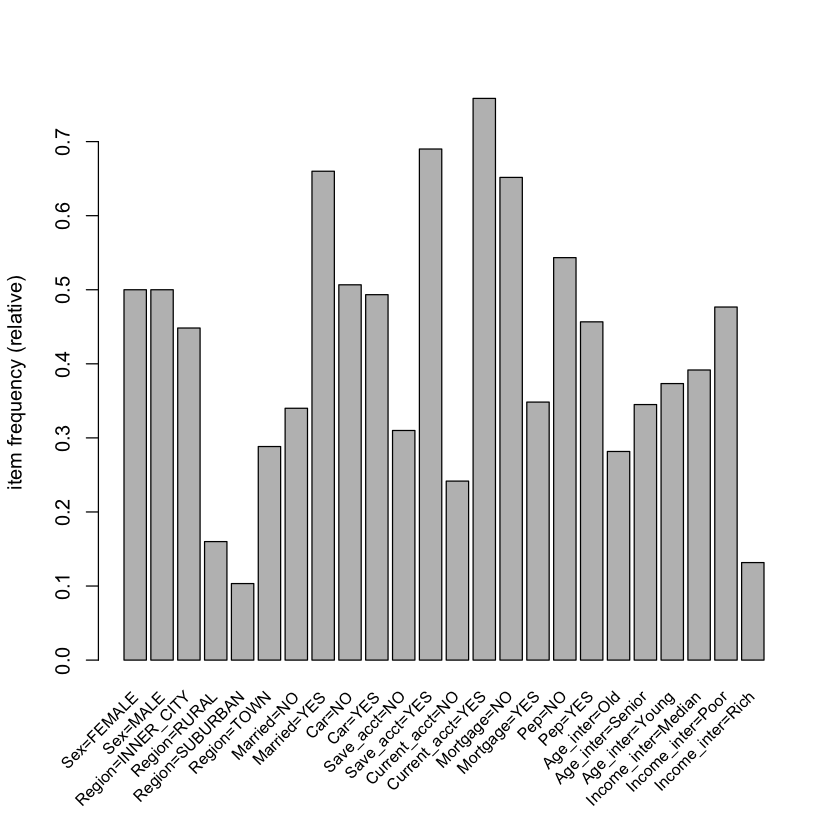

In [11]:
itemFrequencyPlot(myBank, support = 0.1, cex.names=0.8);
fsets = eclat(myBank, parameter = list(support = 0.1), control = list(verbose=FALSE));
singleItems = fsets[size(items(fsets)) == 1];
singleSupport = quality(singleItems)$support;
names(singleSupport) = unlist(LIST(items(singleItems), decode = FALSE));
head(singleSupport, n = 5);
itemsetList = LIST(items(fsets), decode = FALSE);
allConfidence = quality(fsets)$support / sapply(itemsetList, function(x)
max(singleSupport[as.character(x)]));
quality(fsets) = cbind(quality(fsets), allConfidence);

<font size=3 color="#5A5A5A" face = "Lano">
Once again, using the eclat function we are able to create typologies. In our example we selected minimum attribut length of 2 in order to really have associations like we did in TD for shopping.<br>
So we selected the 30 most relevent association according to the support and display it.
</font>

In [12]:
#### Associations Rule ####

itemsets <- eclat(myBank, parameter = list(minlen = 2, tidLists = TRUE)) #Dont take maxlen the more item there will be the best its gonna be
summary(itemsets)
fsets.top30 <- sort(itemsets)[1:30]
inspect(fsets.top30)

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
     TRUE     0.1      2     10 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 60 

create itemset ... 
set transactions ...[24 item(s), 600 transaction(s)] done [0.00s].
sorting and recoding items ... [24 item(s)] done [0.00s].
creating bit matrix ... [24 row(s), 600 column(s)] done [0.00s].
writing  ... [891 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].


set of 891 itemsets

most frequent items:
Current_acct=YES    Save_acct=YES      Married=YES      Mortgage=NO 
             326              272              267              253 
          Pep=NO          (Other) 
             202             1458 

element (itemset/transaction) length distribution:sizes
  2   3   4   5 
188 438 237  28 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   3.118   4.000   5.000 

summary of quality measures:
    support      
 Min.   :0.1000  
 1st Qu.:0.1133  
 Median :0.1333  
 Mean   :0.1559  
 3rd Qu.:0.1750  
 Max.   :0.5317  

includes transaction ID lists: TRUE 

mining info:
   data ntransactions support
 myBank           600     0.1

     items                                        support  
[1]  {Save_acct=YES,Current_acct=YES}             0.5316667
[2]  {Current_acct=YES,Mortgage=NO}               0.5016667
[3]  {Married=YES,Current_acct=YES}               0.4883333
[4]  {Married=YES,Save_acct=YES}                  0.4616667
[5]  {Save_acct=YES,Mortgage=NO}                  0.4500000
[6]  {Married=YES,Mortgage=NO}                    0.4350000
[7]  {Current_acct=YES,Pep=NO}                    0.4066667
[8]  {Married=YES,Pep=NO}                         0.4033333
[9]  {Car=NO,Current_acct=YES}                    0.3916667
[10] {Save_acct=YES,Pep=NO}                       0.3916667
[11] {Sex=FEMALE,Current_acct=YES}                0.3833333
[12] {Sex=MALE,Current_acct=YES}                  0.3750000
[13] {Car=YES,Current_acct=YES}                   0.3666667
[14] {Current_acct=YES,Income_inter=Poor}         0.3600000
[15] {Save_acct=YES,Current_acct=YES,Mortgage=NO} 0.3533333
[16] {Current_acct=YES,Pep=YES}         

<br>
<br>
<font size=3 color="#5A5A5A" face = "Lano">
<font size=5>
<b>VI</b> - Go ahead<br><br>
</font>
As the question 5 was free enough we decided to build different kind of graphics using 'arules' and 'arulesViz' functions/tools in order to display different kind of typologies in the last part of our work.<br>
To improve our visualization we played with some others functions of our libraries !<br><br>
So let's for example create a cross table !
</font>

In [13]:
size_matrice = 3
lift <- crossTable(myBank, measure="lift", sort=TRUE)
lift[1:size_matrice,1:size_matrice]

,Current_acct=YES,Save_acct=YES,Married=YES
Current_acct=YES,NA,1.016085,0.975691
Save_acct=YES,1.016085,NA,1.013761
Married=YES,0.975691,1.013761,NA


<font size=3 color="#5A5A5A" face = "Lano">
...and a cluster dendrogram !
</font>

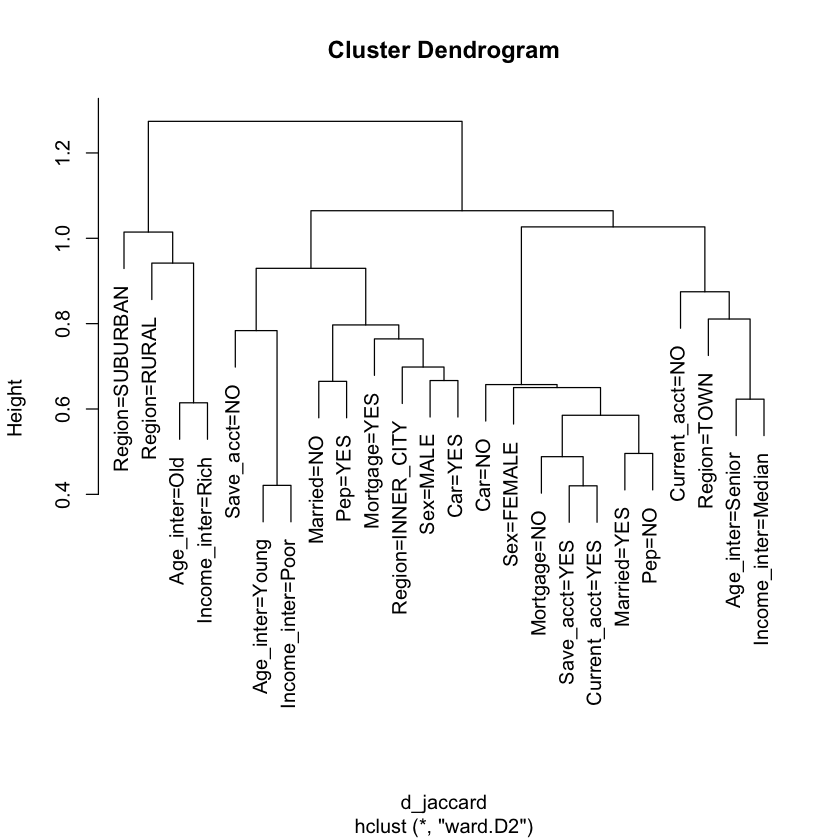

In [14]:
s <- myBank[,itemFrequency(myBank)>0.05]
    d_jaccard <- dissimilarity(s, which = "items")
    plot(hclust(d_jaccard, method = "ward.D2"))

<br>
<font size=3 color="#5A5A5A" face = "Lano">
The following example compares the item frequencies of people with a large income (boxes) with the average in the data set.
</font>

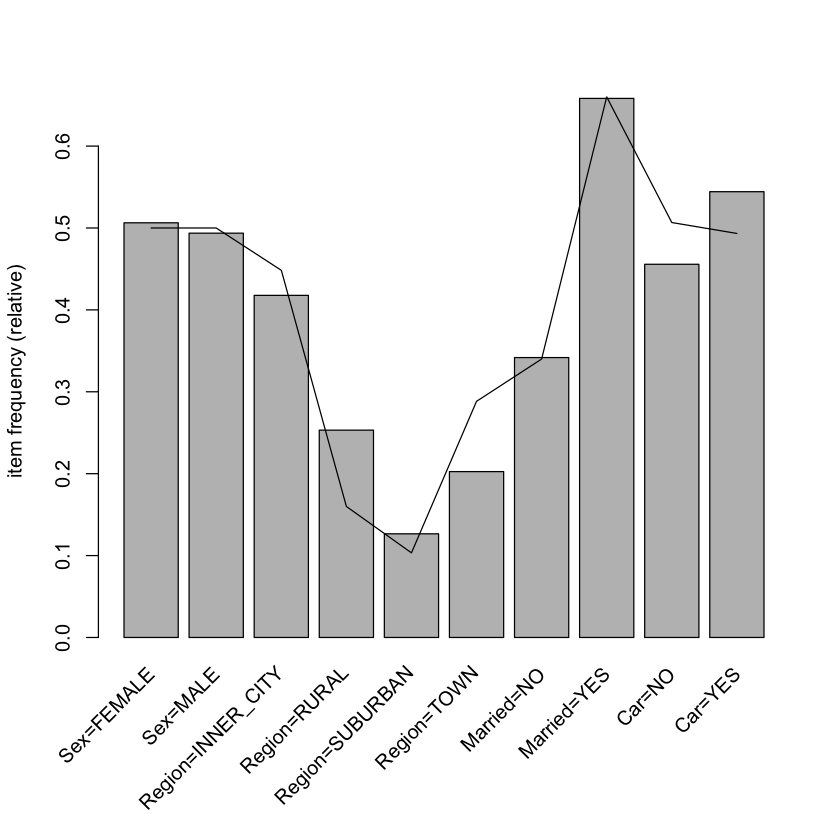

In [15]:
myBank.largeIncome <- myBank[myBank %in% "Income_inter=Rich"]
itemFrequencyPlot(myBank.largeIncome[, 1:10], population = myBank[, 1:10])

<font size=3 color="#5A5A5A" face = "Lano">
Thank you for watching, I hope it was interesting and meaningful.
</font>